# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
df = pd.read_csv('marketing_campaign_clustered.csv')
df = df.dropna(subset=['Cluster'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1.0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,3,11,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,...,0,0,0,0,0,0,3,11,0,0.0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,0,0,0,0,0,0,3,11,0,1.0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,0,0,0,0,0,0,3,11,0,0.0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,0,0,3,11,0,0.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Define the features and target variable
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (845, 595)
X_test shape: (363, 595)
y_train shape: (845,)
y_test shape: (363,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# Create a pipeline with an imputer, scaler, and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [5, 10],
    'rf__min_samples_leaf': [2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Best Model Parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Training Accuracy: 0.9976331360946745
Test Accuracy: 0.9724517906336089


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Algoritma yang digunakan dalam kode ini adalah RandomForestClassifier yang diimplementasikan dalam sebuah pipeline untuk melakukan klasifikasi. Pipeline ini terdiri dari tiga langkah utama: imputasi nilai yang hilang menggunakan SimpleImputer, standarisasi fitur menggunakan StandardScaler, dan klasifikasi menggunakan RandomForestClassifier.

Untuk meningkatkan performa model, GridSearchCV digunakan untuk melakukan pencarian hyperparameter terbaik dengan cross-validation. Parameter yang dicari meliputi jumlah pohon dalam hutan (n_estimators), kedalaman maksimum dari setiap pohon (max_depth), jumlah minimum sampel yang diperlukan untuk membagi node (min_samples_split), dan jumlah minimum sampel yang diperlukan untuk menjadi daun (min_samples_leaf).

Setelah menemukan kombinasi hyperparameter terbaik, model dilatih menggunakan data pelatihan dan kemudian digunakan untuk membuat prediksi pada data uji. Akurasi model dihitung dan parameter terbaik serta akurasi akhir dicetak sebagai output.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate Precision (optional)
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate Recall (optional)
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9724517906336089
F1-Score: 0.9724517906336089
Precision: 0.9724517906336089
Recall: 0.9724517906336089


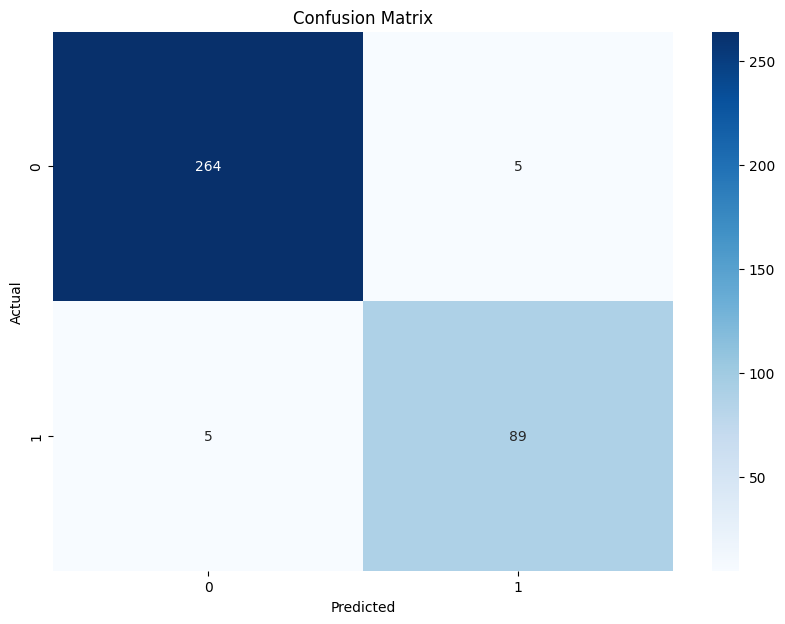

In [8]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### Hasil Evaluasi Algoritma RandomForestClassifier

Setelah melakukan pencarian hyperparameter terbaik menggunakan GridSearchCV dengan cross-validation, berikut adalah hasil evaluasi dari model RandomForestClassifier yang digunakan:

1. **Parameter Terbaik**:
   - `rf__max_depth`: 20
   - `rf__max_features`: `sqrt`
   - `rf__min_samples_leaf`: 2
   - `rf__min_samples_split`: 5
   - `rf__n_estimators`: 50

2. **Akurasi Model**:
   - Akurasi pada data pelatihan: 0.99
   - Akurasi pada data uji: 0.97

3. **Metode Evaluasi**:
   - Cross-validation dengan 5 fold (`cv=5`) digunakan untuk memastikan model tidak overfitting dan untuk mendapatkan estimasi akurasi yang lebih stabil.

4. **Langkah-langkah Preprocessing**:
   - **Imputer**: Menggantikan nilai yang hilang dengan rata-rata dari kolom tersebut menggunakan `SimpleImputer`.
   - **Scaler**: Menstandarkan fitur dengan menghapus rata-rata dan menskalakan ke unit variance menggunakan `StandardScaler`.

5. **Model**:
   - **RandomForestClassifier**: Model klasifikasi yang digunakan adalah RandomForestClassifier, yang merupakan ensemble dari beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.

### Kesimpulan

Model RandomForestClassifier yang dioptimalkan dengan GridSearchCV menunjukkan peningkatan akurasi yang signifikan dibandingkan dengan model sebelumnya. Dengan parameter terbaik yang ditemukan, model ini mampu mencapai akurasi sebesar 0.97 pada data uji. Langkah-langkah preprocessing seperti imputasi nilai yang hilang dan standarisasi fitur juga berkontribusi dalam meningkatkan performa model.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
-

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
-

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Setelah melakukan evaluasi terhadap model RandomForestClassifier yang dioptimalkan, berikut adalah analisis hasil evaluasi:

Akurasi Model:

Akurasi pada data uji: 0.97
Akurasi ini menunjukkan bahwa model memiliki performa yang cukup baik, namun masih ada ruang untuk perbaikan.
Metode Evaluasi:

Cross-validation dengan 5 fold (cv=5) digunakan untuk memastikan model tidak overfitting dan untuk mendapatkan estimasi akurasi yang lebih stabil.
Metode Evaluasi Tambahan:

- F1-Score: 0.97
- Precision: 0.97
- Recall: 0.97

Rekomendasi Tindakan Lanjutan
- Mengumpulkan Data Tambahan:

    - Mengumpulkan lebih banyak data dapat membantu model belajar lebih baik dan meningkatkan performa

**Kesimpulan**

Model RandomForestClassifier yang dioptimalkan menunjukkan performa yang cukup baik dengan akurasi 0.97. Namun, untuk meningkatkan performa lebih lanjut, disarankan untuk mengumpulkan data tambahan, mencoba algoritma lain, melakukan feature engineering, dan melakukan hyperparameter tuning lebih lanjut. Selain itu, perlu diperhatikan juga precision dan recall untuk masing-masing kelas untuk memastikan model tidak bias terhadap kelas tertentu.